In [1]:
#setup for the dataframe

import pandas as pd
import datetime as dt

df = pd.read_csv("./hsg_export_28.csv", sep = ";")
df = df.loc[(df["meter_point"] == "Power.Active.Import ") & (df["value"] != "0")]
df["value"] = df["value"].str.replace(',', '.').astype(float) / 1000
stamm = pd.read_excel("./vlotte_HSG_StammdatenLadepunkte_20231127.xlsx")

stamm_relevant = stamm[["ChargeStationID", "AccessLevel" ]].copy()
stamm_relevant = stamm_relevant.dropna()
stamm_relevant["ChargeStationID"] = stamm_relevant["ChargeStationID"].str.replace("{","").str.replace("}","")
stamm_relevant.set_index("ChargeStationID", inplace=True)

stamm_dict = stamm_relevant.to_dict()
stamm_dict = stamm_dict["AccessLevel"]

df["ChargeStationID"] = df["ChargeStationID"].str.upper()
df["AccessLevel"] = df["ChargeStationID"].map(stamm_dict)
df = df.loc[df["AccessLevel"] == "PRIVATE"].copy()

df = df[["ChargeStationID", "timestamp_message_UTC", "value"]]


df["timestamp_message_UTC"] = pd.to_datetime(df["timestamp_message_UTC"], utc=True)
df["hour"] = df["timestamp_message_UTC"].dt.hour
df["date"] = df["timestamp_message_UTC"].dt.date
#df.to_csv("cleaned.csv", index=False)

df

,ChargeStationID,timestamp_message_UTC,value,hour,date
32,48A4BC2C-A843-5364-3EC0-5B321AE1F9D1,2023-11-15 12:12:49+00:00,11.1049,12,2023-11-15
73,48A4BC2C-A843-5364-3EC0-5B321AE1F9D1,2023-11-15 16:30:13+00:00,7.9211,16,2023-11-15
79,48A4BC2C-A843-5364-3EC0-5B321AE1F9D1,2023-11-15 16:54:47+00:00,14.7627,16,2023-11-15
104,A381773C-CD6B-F06C-8C11-A970FBE0E2A6,2023-11-15 16:46:48+00:00,2.0138,16,2023-11-15
137,A381773C-CD6B-F06C-8C11-A970FBE0E2A6,2023-11-15 16:51:33+00:00,3.5310,16,2023-11-15
...,...,...,...,...,...
4996146,4F48EBDE-B778-41F9-BABB-4FD141E82B28,2023-11-28 02:04:30+00:00,3.5630,2,2023-11-28
4996171,DF6F7A35-4276-81BF-5A88-822C447D9DC4,2023-11-28 02:04:24+00:00,2.0820,2,2023-11-28
4996251,E5253A63-3629-4D7E-841C-054331F21775,2023-11-28 02:05:02+00:00,3.5160,2,2023-11-28
4996256,991522B3-33C9-43F1-B7E3-37792342F003,2023-11-28 02:05:03+00:00,1.8750,2,2023-11-28


In [2]:
import pandas as pd
df = pd.read_csv("./cleaned.csv")
df


,ChargeStationID,timestamp_message_UTC,value,hour,date
0,48A4BC2C-A843-5364-3EC0-5B321AE1F9D1,2023-11-15 12:12:49+00:00,11.1049,12,2023-11-15
1,48A4BC2C-A843-5364-3EC0-5B321AE1F9D1,2023-11-15 16:30:13+00:00,7.9211,16,2023-11-15
2,48A4BC2C-A843-5364-3EC0-5B321AE1F9D1,2023-11-15 16:54:47+00:00,14.7627,16,2023-11-15
3,A381773C-CD6B-F06C-8C11-A970FBE0E2A6,2023-11-15 16:46:48+00:00,2.0138,16,2023-11-15
4,A381773C-CD6B-F06C-8C11-A970FBE0E2A6,2023-11-15 16:51:33+00:00,3.5310,16,2023-11-15
...,...,...,...,...,...
231943,4F48EBDE-B778-41F9-BABB-4FD141E82B28,2023-11-28 02:04:30+00:00,3.5630,2,2023-11-28
231944,DF6F7A35-4276-81BF-5A88-822C447D9DC4,2023-11-28 02:04:24+00:00,2.0820,2,2023-11-28
231945,E5253A63-3629-4D7E-841C-054331F21775,2023-11-28 02:05:02+00:00,3.5160,2,2023-11-28
231946,991522B3-33C9-43F1-B7E3-37792342F003,2023-11-28 02:05:03+00:00,1.8750,2,2023-11-28


In [3]:
df["timestamp_message_UTC"] = pd.to_datetime(df["timestamp_message_UTC"], format="mixed")
df["hour"] = df["timestamp_message_UTC"].dt.hour
df["date"] = df["timestamp_message_UTC"].dt.date
df["day_name"] = df["timestamp_message_UTC"].dt.day_name()
df

,ChargeStationID,timestamp_message_UTC,value,hour,date,day_name
0,48A4BC2C-A843-5364-3EC0-5B321AE1F9D1,2023-11-15 12:12:49+00:00,11.1049,12,2023-11-15,Wednesday
1,48A4BC2C-A843-5364-3EC0-5B321AE1F9D1,2023-11-15 16:30:13+00:00,7.9211,16,2023-11-15,Wednesday
2,48A4BC2C-A843-5364-3EC0-5B321AE1F9D1,2023-11-15 16:54:47+00:00,14.7627,16,2023-11-15,Wednesday
3,A381773C-CD6B-F06C-8C11-A970FBE0E2A6,2023-11-15 16:46:48+00:00,2.0138,16,2023-11-15,Wednesday
4,A381773C-CD6B-F06C-8C11-A970FBE0E2A6,2023-11-15 16:51:33+00:00,3.5310,16,2023-11-15,Wednesday
...,...,...,...,...,...,...
231943,4F48EBDE-B778-41F9-BABB-4FD141E82B28,2023-11-28 02:04:30+00:00,3.5630,2,2023-11-28,Tuesday
231944,DF6F7A35-4276-81BF-5A88-822C447D9DC4,2023-11-28 02:04:24+00:00,2.0820,2,2023-11-28,Tuesday
231945,E5253A63-3629-4D7E-841C-054331F21775,2023-11-28 02:05:02+00:00,3.5160,2,2023-11-28,Tuesday
231946,991522B3-33C9-43F1-B7E3-37792342F003,2023-11-28 02:05:03+00:00,1.8750,2,2023-11-28,Tuesday


In [11]:
station = df.loc[df["ChargeStationID"] == "4940A04D-62A0-ADF5-FE81-B67DD755CECC"].copy()
station = station.groupby(["day_name", "hour"]).agg({"value": "mean"}).reset_index()
station
station.head(20)

C:\Users\lisar\AppData\Local\Temp\ipykernel_7052\635474357.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station = station.groupby(["day_name", "hour"]).agg({"value": "mean"}).reset_index()


,day_name,hour,value
0,Monday,0,NaN
1,Monday,1,NaN
2,Monday,2,NaN
3,Monday,3,NaN
4,Monday,4,2.041393
5,Monday,5,1.779734
6,Monday,6,2.002642
7,Monday,7,NaN
8,Monday,8,NaN
9,Monday,9,2.359905


In [9]:
heatmap_data = station.pivot_table(index='hour', columns='day_name', values='value', aggfunc='sum')
heatmap_data

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,3.713186,NaN,1.513067,1.365200,1.715332,0.681994,2.087159
1,4.476905,NaN,1.513219,0.544180,1.462283,0.753300,3.490770
2,2.291303,NaN,0.935415,0.567973,0.849350,NaN,1.174203
3,1.851397,NaN,0.519041,0.567473,0.523239,NaN,0.406729
4,1.634616,2.041393,0.559065,0.569907,1.450083,2.149300,2.069890
5,1.762025,1.779734,0.578548,0.573132,1.362943,2.050900,1.966056
6,1.420625,2.002642,NaN,0.581514,1.925905,1.865063,1.183206
7,0.577893,NaN,NaN,NaN,1.722389,2.369550,0.572475
8,NaN,NaN,NaN,NaN,1.640643,2.355923,0.587333


In [10]:
heatmap_data = station.pivot_table(index='hour', columns='day_name', values='value', aggfunc='mean')
heatmap_data

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,3.713186,NaN,1.513067,1.365200,1.715332,0.681994,2.087159
1,4.476905,NaN,1.513219,0.544180,1.462283,0.753300,3.490770
2,2.291303,NaN,0.935415,0.567973,0.849350,NaN,1.174203
3,1.851397,NaN,0.519041,0.567473,0.523239,NaN,0.406729
4,1.634616,2.041393,0.559065,0.569907,1.450083,2.149300,2.069890
5,1.762025,1.779734,0.578548,0.573132,1.362943,2.050900,1.966056
6,1.420625,2.002642,NaN,0.581514,1.925905,1.865063,1.183206
7,0.577893,NaN,NaN,NaN,1.722389,2.369550,0.572475
8,NaN,NaN,NaN,NaN,1.640643,2.355923,0.587333


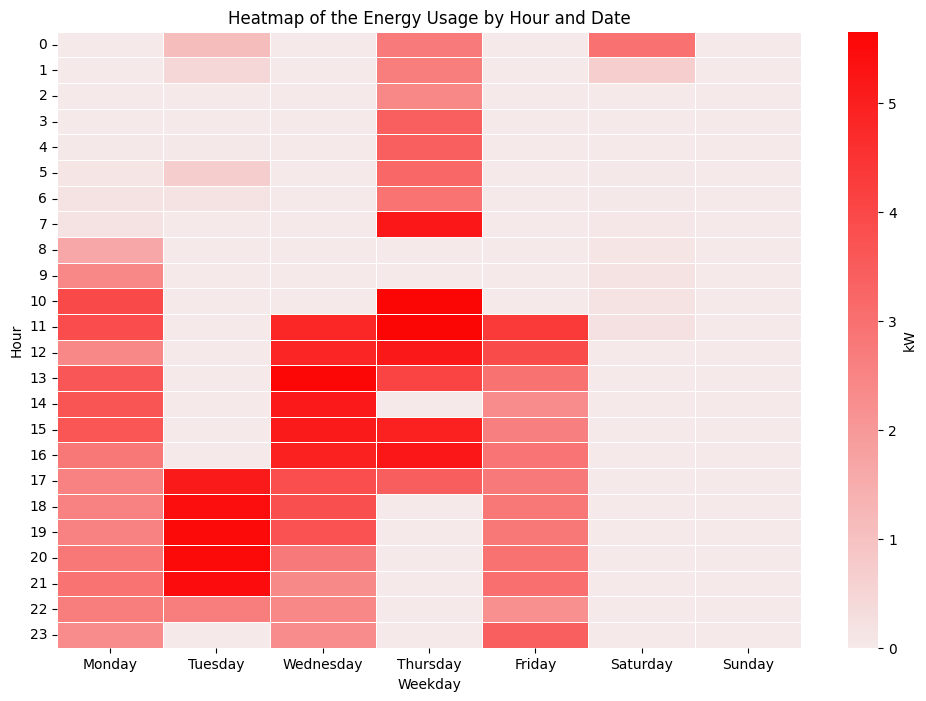

In [8]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv("./cleaned.csv")

def heatmap(id):
    df["timestamp_message_UTC"] = pd.to_datetime(df["timestamp_message_UTC"], format="mixed")
    df["hour"] = df["timestamp_message_UTC"].dt.hour
    df["date"] = df["timestamp_message_UTC"].dt.date
    df["day_name"] = df["timestamp_message_UTC"].dt.day_name()

        # Define custom sorting order for days of the week
    days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    # Set the "day_name" column as a categorical variable with the custom order
    df["day_name"] = pd.Categorical(df["day_name"], categories=days_order, ordered=True)

    
    station = df.loc[df["ChargeStationID"] == id].copy()
    #station = station.groupby(["date", "hour"]).agg({"value": "mean"}).reset_index()
    station = station.groupby(["day_name", "hour"], observed=True).agg({"value": "mean"}).reset_index()

    cmap = LinearSegmentedColormap.from_list('custom', ['#f5e9e9', '#fc0505'])

    #heatmap_data = station.pivot_table(index='hour', columns='date', values='value', aggfunc='sum')
    heatmap_data = station.pivot_table(index='hour', columns='day_name', values='value', aggfunc='sum')

    plt.figure(figsize=(12, 8))
    heatmap_plot = sns.heatmap(heatmap_data, cmap=cmap, annot=False, fmt=".1f", linewidths=.5)

    plt.title('Heatmap of the Energy Usage by Hour and Date')
    plt.xlabel('Weekday')
    plt.ylabel('Hour')

    cbar = heatmap_plot.collections[0].colorbar
    cbar.set_label('kW')


    #date_labels = [f"{date.strftime('%d.%m.%Y')} {date.strftime('%a')}" for date in heatmap_data.columns]
    #plt.xticks(ticks=[i + 0.5 for i in range(len(date_labels))], labels=date_labels, rotation=90, ha='right', rotation_mode='anchor')
    plt.yticks(rotation=0)
   
    return plt.show()

heatmap("0A5AF9C9-F05A-BF52-FCE5-C89917335F67")

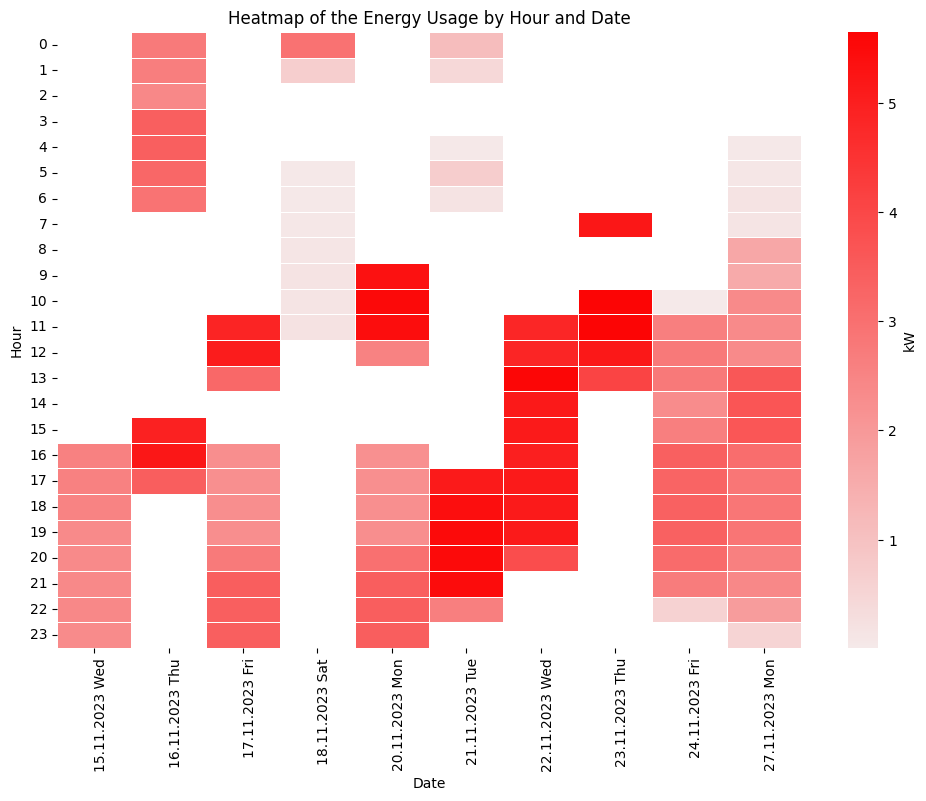

In [65]:
heatmap("0A5AF9C9-F05A-BF52-FCE5-C89917335F67")

In [66]:
df["ChargeStationID"].value_counts()

ChargeStationID
4940A04D-62A0-ADF5-FE81-B67DD755CECC    17856
69E00694-AE12-4D48-8764-F6869BBD6448     9693
4C704285-AAEE-4849-8F24-0AA64D921EC8     8374
ABF8E17F-D0AA-E094-B5CB-1B01D712F708     6888
C9D021AF-B27D-7EE2-1357-2CBF59EB343D     6598
                                        ...  
98DBA2E0-8F2C-483D-AE7C-4143FF00EB9A        8
230724AC-C1ED-4BEB-2F82-08D8BC6276F0        7
D680310D-E072-4C8B-5312-DCDAFDF6EF36        6
C749CEAA-07D8-CF67-FEC0-E513AE886DF0        4
05B8302A-44AD-40ED-B296-6A8E3E1EECC8        4
Name: count, Length: 268, dtype: int64

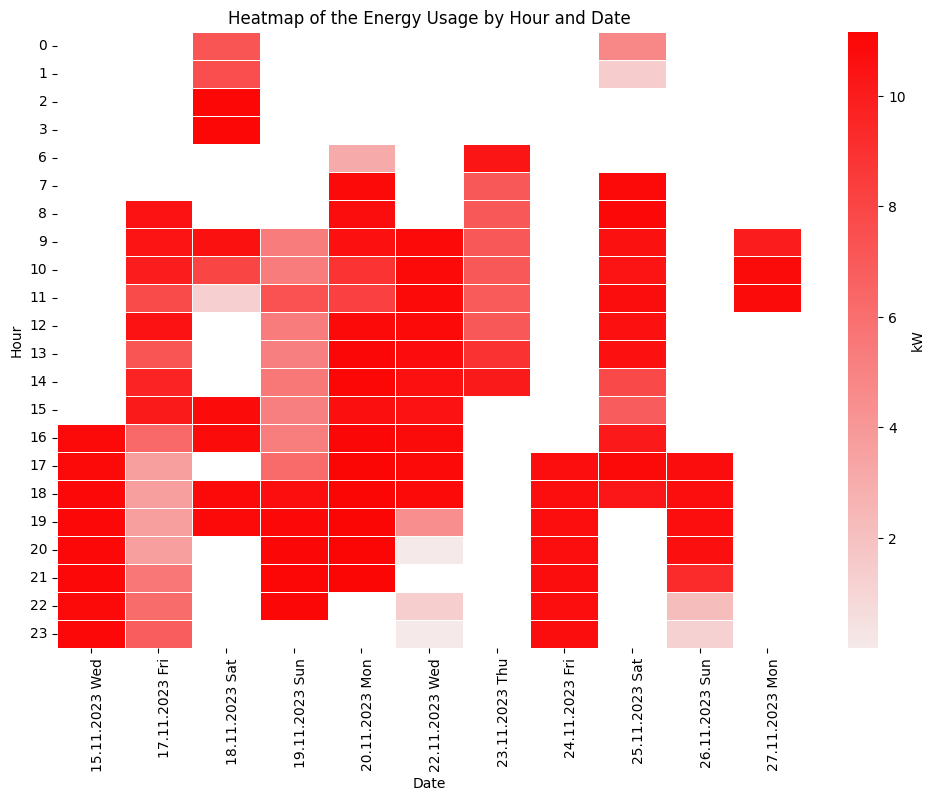

In [79]:
heatmap("69E00694-AE12-4D48-8764-F6869BBD6448")